### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df = df.drop('Loan_ID', axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(0)

In [3]:
df['Loan_Amount_Term'].isnull().sum()

0

In [4]:
mode_term = df['Loan_Amount_Term'].mode()
mode_term

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [5]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(0, 360) 

### Extreme Values - Standardization

Loan Amount Manipulation

<AxesSubplot:>

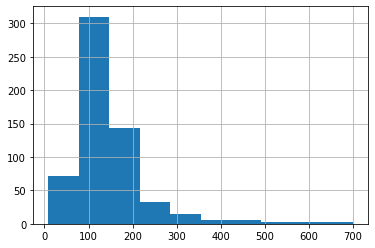

In [6]:
# Hist Pre log
df['LoanAmount'].hist()

In [7]:
dflog = df.copy()

In [8]:
dflog['LoanAmount_Log'] = np.log2(dflog['LoanAmount'])

In [9]:
dflog['LoanAmount_Log'].std()

0.7287659596010903

<AxesSubplot:>

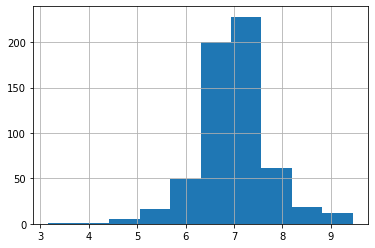

In [10]:
# Distribution of Loan Amount after log 
dflog['LoanAmount_Log'].hist()

<AxesSubplot:>

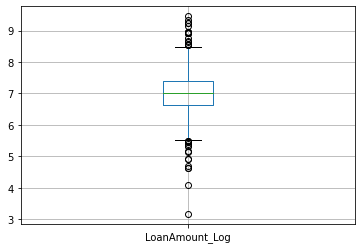

In [11]:
dflog.boxplot(column = 'LoanAmount_Log' )

In [12]:
mean_loan = dflog['LoanAmount_Log'].mean()
mean_loan

7.007810628047801

In [13]:
dflog['LoanAmount_Log'] = dflog['LoanAmount_Log'].fillna(0)

In [14]:
dflog['LoanAmount_Log'] = dflog['LoanAmount_Log'].replace(0, mean_loan) 

Income Amount Manipulation

<AxesSubplot:>

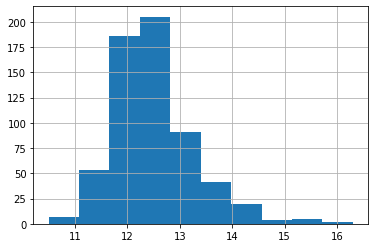

In [15]:
dflog['TotalIncome'] = dflog['ApplicantIncome'] + dflog['CoapplicantIncome']
dflog['TotalIncome_Log'] = np.log2(dflog['TotalIncome'])
dflog['TotalIncome_Log'].hist()

In [16]:
dflog['TotalIncome_Log'].std()

0.7864152838057724

In [17]:
dflog = dflog.drop(['TotalIncome', 'LoanAmount'], axis = 1)

Gender Manipulation

In [18]:
mode_Gender = dflog['Gender'].mode()
mode_Gender

0    Male
Name: Gender, dtype: object

In [19]:
dflog['Dependents'] =dflog['Dependents'].fillna('0')
dflog['Gender'] =dflog['Gender'].fillna('mode_Gender')

In [32]:
df = dflog.dropna()

In [33]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_Log       0
TotalIncome_Log      0
dtype: int64

Dummy Variable Creation

In [34]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df['Education'] = df['Education'].apply(lambda x: 0 if x=='Graduate' else 1)
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)
df['Married'] = df['Married'].apply(lambda x: 0 if x=='Yes' else 1)
df['Dependents'] = df['Dependents'].replace('3+', '3')

/var/folders/p7/h49crc791_s32gzljswx64y00000gn/T/ipykernel_29928/1058769562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
/var/folders/p7/h49crc791_s32gzljswx64y00000gn/T/ipykernel_29928/1058769562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)
/var/folders/p7/h49crc791_s32gzljswx64y00000gn/T/ipykernel_29928/1058769562.py:3: SettingWithCopyWarning: 
A value 

In [35]:
df2 = pd.get_dummies(df['Property_Area'])

In [36]:
df = df.join(df2)

In [37]:
df = df.drop(['Property_Area', 'ApplicantIncome', 'CoapplicantIncome'], axis = 1)

In [38]:
df['Credit_History'] = df['Credit_History'].astype('int64')

In [39]:
df['Dependents'] = df['Dependents'].astype('int64')

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Log,TotalIncome_Log,Rural,Semiurban,Urban
0,0,1,0,0,0,360.0,1,1,7.007811,12.513974,0,0,1
1,0,0,1,0,0,360.0,1,0,7.000000,12.572463,1,0,0
2,0,0,0,0,1,360.0,1,1,6.044394,11.550747,0,0,1
3,0,0,0,1,0,360.0,1,1,6.906891,12.270587,0,0,1
4,0,1,0,0,0,360.0,1,1,7.139551,12.550747,0,0,1


In [41]:
df.to_csv('Cleaned_Loaner_Data.csv')